In [ ]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pathlib import Path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rc
import matplotlib.ticker as mtick

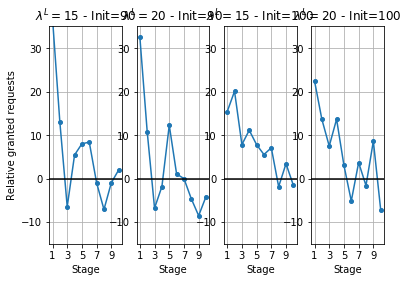

In [44]:
# Relative performance

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pathlib import Path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rc
import matplotlib.ticker as mtick

# cost: C0, o
# abilene: C1, *

######### small networks #########
Networks = ["abilene"]
Sim = "1"
Stage = "10"
Ws = ['6','7']
Inits = ["90",'100']
Rs = ['10']
Ds = ['15','20']

S = ['500']
Strategy = ['0',"1"]

n1_col='C0'
n2_col='C1'

markers=['o','*']

fig, axs = plt.subplots(ncols=4)

counter_plots=0
for i in range(2):
    for j in range(2):
        df_n1_det_g = pd.read_excel(Networks[0]+Inits[i]+"Init"+Inits[i]+"W"+Ws[i]+"R"+Rs[0]+"D"+Ds[j]+"Init"+Inits[i]+".xlsx", 'GoS-'+S[0] +'-'+Strategy[1], usecols=range(1,11))
        df_n1_s_g = pd.read_excel(Networks[0]+Inits[i]+"Init"+Inits[i]+"W"+Ws[i]+"R"+Rs[0]+"D"+Ds[j]+"Init"+Inits[i]+".xlsx", 'GoS-'+S[0]+'-'+Strategy[0],usecols=range(1,11))

        df_n1_det_a = pd.read_excel(Networks[0]+Inits[i]+"Init"+Inits[i]+"W"+Ws[i]+"R"+Rs[0]+"D"+Ds[j]+"Init"+Inits[i]+".xlsx", 'adds-'+S[0] +'-'+Strategy[1], usecols=range(1,11))
        df_n1_s_a = pd.read_excel(Networks[0]+Inits[i]+"Init"+Inits[i]+"W"+Ws[i]+"R"+Rs[0]+"D"+Ds[j]+"Init"+Inits[i]+".xlsx", 'adds-'+S[0]+'-'+Strategy[0],usecols=range(1,11))

#         axs[0,2*i+j].plot(range(1, 11),(df_n1_s_g.mean()-df_n1_det_g.mean())/df_n1_det_g.mean()*100, color=n1_col, marker = markers[0], markerfacecolor = n1_col, markersize = 4, label=Networks[0].lower())
#         axs[0,2*i+j].set_title(r'$\lambda^L=$'+Ds[j]+" - Init="+Inits[i])
#         axs[0,2*i+j].set_ylim(0,5)
        axs[counter_plots].plot(range(1, 11),(df_n1_s_a.mean()-df_n1_det_a.mean())/df_n1_det_a.mean()*100, color=n1_col, marker = markers[0], markerfacecolor = n1_col, markersize = 4, label=Networks[0].lower())
        axs[counter_plots].set_xlabel('Stage')
        axs[counter_plots].set_ylim(-15,35)
        axs[counter_plots].set_title(r'$\lambda^L=$'+Ds[j]+" - Init="+Inits[i])
        counter_plots = counter_plots + 1
        
for j in range(4):
    axs[j].grid()
    axs[j].axhline(y=0, color='k')
    axs[j].set_xticks(range(1, 11,2))
    axs[j].set_xticklabels((range(1, 11,2)))

axs[0].set_ylabel('Relative granted requests')

import tikzplotlib

tikzplotlib.save("../Figures/improved-LR-" + Networks[0] + "add.tex")



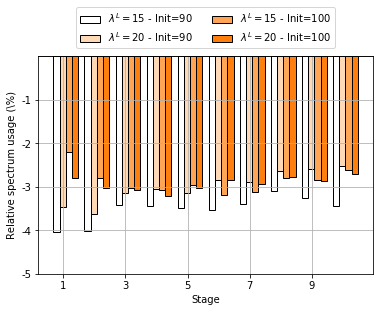

In [43]:
# Spectrum usage

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pathlib import Path
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import rc
import matplotlib.ticker as mtick

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": [],   # use latex default serif font
})

# cost: C0, o
# abilene: C1, *

# ###### cost #######
# Networks = ["COST239"]
# Sim = "1"
# Stage = "10"
# Ws = ['10','10']
# Inits = ['250','260']
# Rs = ['10']
# Ds = ['15','20']
# Ns = ["1"]

# S = ['100']
# Strategy = ['0',"1"]

# n1_col='tab:blue'

###### abilene #######
Networks = ["abilene"]
Sim = "1"
Stage = "10"
Ws = ['6','7']
Inits = ["90",'100']
Rs = ['10']
Ds = ['15','20']

S = ['500']
Strategy = ['0',"1"]

n1_col='tab:orange'



n1_hatch =['/', '\\', '-']

pos = list(range(1, 11)) 
width = 0.2 

fig, ax = plt.subplots()

opacity=[0, 0.3, 0.7, 1]

counter = 0
for i in range(2):
    for j in range(2):
        df_n1_det_l = pd.read_excel(Networks[0]+Inits[i]+"Init"+Inits[i]+"W"+Ws[i]+"R"+Rs[0]+"D"+Ds[j]+"Init"+Inits[i]+".xlsx", 'link_usage-'+S[0] +'-'+Strategy[1], usecols=range(1,11))
        df_n1_s_l = pd.read_excel(Networks[0]+Inits[i]+"Init"+Inits[i]+"W"+Ws[i]+"R"+Rs[0]+"D"+Ds[j]+"Init"+Inits[i]+".xlsx", 'link_usage-'+S[0]+'-'+Strategy[0],usecols=range(1,11))
        ax.bar([p + width*counter for p in pos],(df_n1_det_l.mean()-df_n1_s_l.mean())/df_n1_det_l.mean()*100, width, edgecolor='k',facecolor=(mpl.colors.to_rgba(n1_col, alpha=opacity[counter])), label=r'$\lambda^L=$'+Ds[j]+ " - Init="+Inits[i] +"$\quad$")
        counter = counter + 1
    
ax.grid()
ax.axhline(y=0, color='k')

# Set the position of the x ticks
ax.set_xticks([p + 1.1 * width for p in np.arange(1, 11, step=2)])

# Set the labels for the x ticks
ax.set_xticklabels(np.arange(1, 11, step=2))
ax.set_ylabel(r'Relative spectrum usage (\%)')
ax.set_xlabel('Stage')
ax.set_ylim(-5,0)
ax.set_yticks(np.arange(-5, 0))
ax.set_yticklabels(np.arange(-5, 0))


ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.25))

import tikzplotlib

tikzplotlib.save("../Figures/"+Networks[0] + "linkusage.tex")
